In [99]:
## Import the packages
import numpy as np
from scipy import stats 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('avocado.csv')
df_original= df.copy()
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
#Practicing loops
for column in list(df.columns):
   print(column,end= '\n')

Unnamed: 0
Date
AveragePrice
Total Volume
4046
4225
4770
Total Bags
Small Bags
Large Bags
XLarge Bags
type
year
region


In [7]:
df.isna().any()

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [8]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.isnull().any()

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [10]:
df.drop('Unnamed: 0',axis=1,inplace = True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


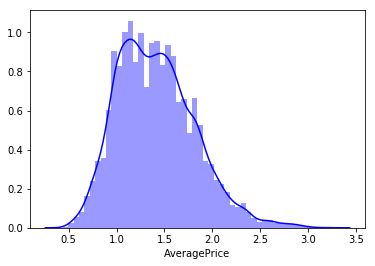

In [100]:

ax = sns.distplot(df["AveragePrice"], color = 'b')

Hypothesis to respond

- H1: Organic is more expensive than conventional

- H2: People prefer to buy small bags of avocados

- H3: The sale of  organic avocados has increased during the years

In [11]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

We removed 'TotalUS', 'West','Southeast','SouthCentral','Northeast' from rows 

In [12]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [56]:
df = df[~df.region.isin(['TotalUS', 'West','Southeast','SouthCentral','Northeast'])]
df.region.nunique()

49

In [57]:
len(df['region'].unique())# The same as .nunique() method

49

In [58]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego',
       'SanFrancisco', 'Seattle', 'SouthCarolina', 'Spokane', 'StLouis',
       'Syracuse', 'Tampa', 'WestTexNewMexico'], dtype=object)

In [59]:
df_region_price_volume = df.groupby(['region'])['AveragePrice'].mean().to_frame()
df_region_price_volume['Total Volume']= df.groupby(['region'])['Total Volume'].sum()
df_region_price_volume.reset_index(inplace=True)
df_region_price_volume.head()

,region,AveragePrice,Total Volume
0,Albany,1.561036,1.606780e+07
1,Atlanta,1.337959,8.860512e+07
2,BaltimoreWashington,1.534231,1.347139e+08
3,Boise,1.348136,1.441319e+07
4,Boston,1.530888,9.727398e+07


In [60]:
df_new=df.groupby(['region','year','type']).agg({'AveragePrice':'mean','Total Volume':'sum'})
df_new.head()

AveragePrice  Total Volume
region year type                                    
Albany 2015 conventional      1.171923    3962854.18
            organic           1.905577      67042.25
       2016 conventional      1.345769    5171564.06
            organic           1.722115      92771.53
       2017 conventional      1.526415    5076262.79

In [61]:
group_df = df.groupby(['region','year']).size().reset_index()
# group_df.columns = 
group_df.nlargest(1,0)

,region,year,0
2,Albany,2017,106


It would be possible to check our hypothesis on a small data from a particular year and region so we are not bias 

In [62]:
df_region_price_volume.columns

Index(['region', 'AveragePrice', 'Total Volume'], dtype='object')

In [110]:
df_region_price_volume.sort_values(by=['Total Volume'],ascending=True,inplace=True)

df_region_price_volume.head(),

(        region  AveragePrice  Total Volume
 46    Syracuse      1.520325   10942667.68
 3        Boise      1.348136   14413187.75
 44     Spokane      1.445592   15565275.48
 0       Albany      1.561036   16067799.97
 23  Louisville      1.286686   16097002.40,)

Text(0, 0.5, 'Avocado Total Volume')

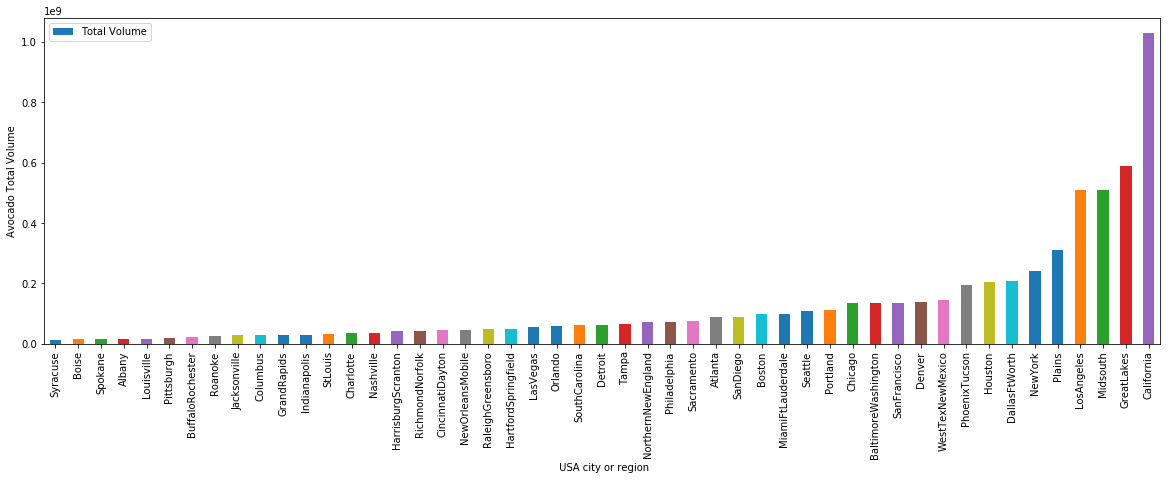

In [111]:
ax= df_region_price_volume.plot.bar(x ='region',y='Total Volume',figsize=(20,6))
ax.set_xlabel(" USA city or region")
ax.set_ylabel("Avocado Total Volume")


In [64]:
df_region_price_volume.sort_values(by=['AveragePrice'],ascending=True,inplace=True)# Ordering to Average Price per region

Text(0, 0.5, 'Avocado Average Price')

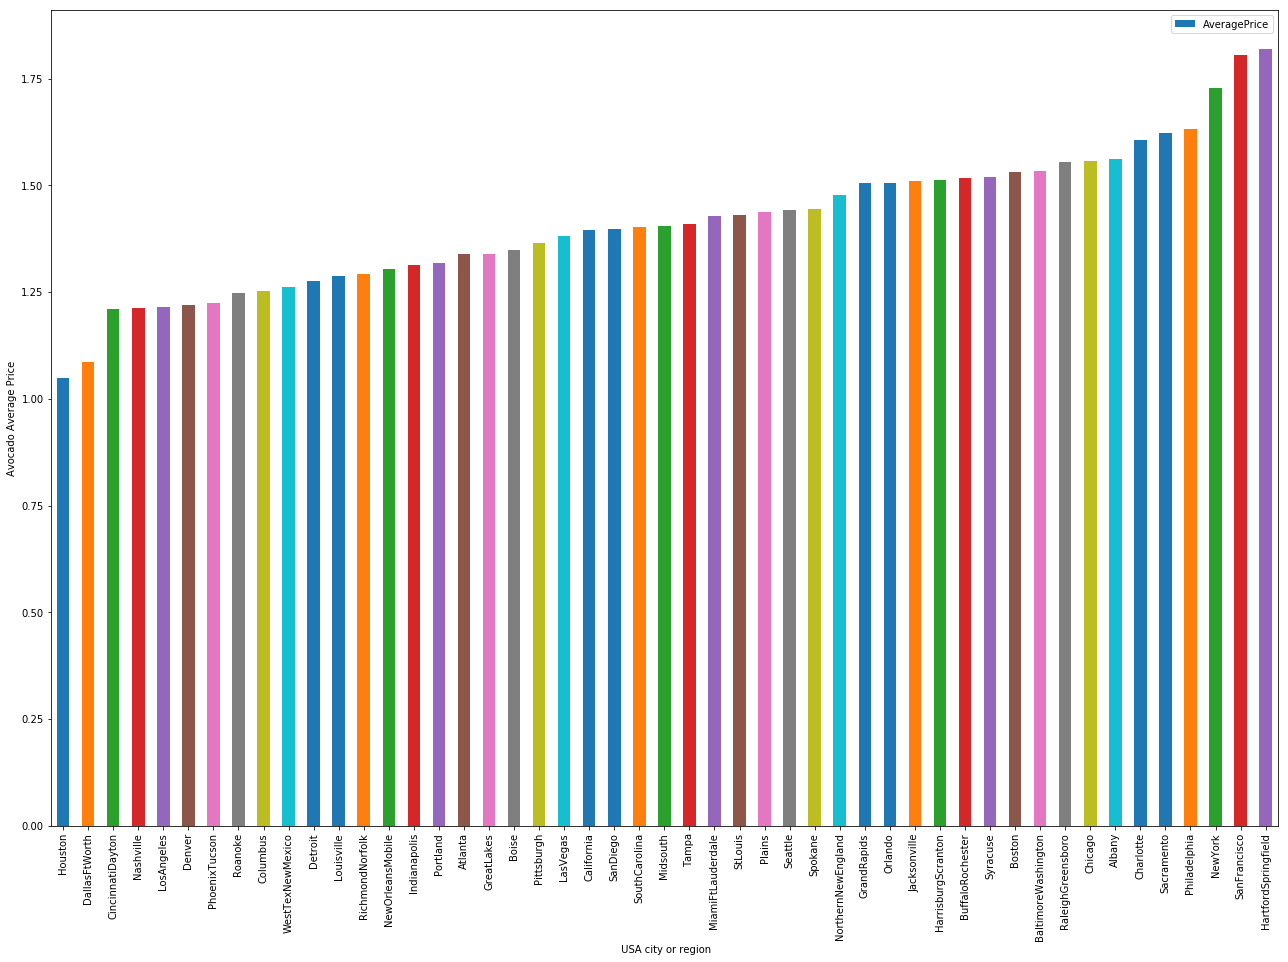

In [65]:

ax= df_region_price_volume.plot.bar(x ='region',y='AveragePrice',figsize=(22,15))
ax.set_xlabel(" USA city or region")
ax.set_ylabel("Avocado Average Price")


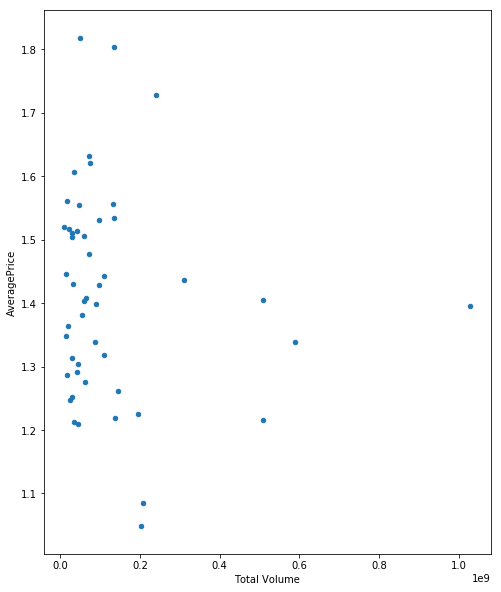

In [112]:
ax1= df_region_price_volume.plot.scatter('Total Volume','AveragePrice',figsize=(8,10))

In [79]:
df_region_price_volume.describe()

,AveragePrice,Total Volume
count,49.000000,4.900000e+01
mean,1.412839,1.271854e+08
std,0.165385,1.836172e+08
min,1.047929,1.094267e+07
25%,1.291331,3.207283e+07
50%,1.404763,6.342242e+07
75%,1.516834,1.347139e+08
max,1.818639,1.028982e+09


In [92]:
df_org_conven = df.groupby(['region','type']).agg({'AveragePrice':'mean'})
df_org_conven.head()

AveragePrice
region              type                      
Albany              conventional      1.348757
                    organic           1.773314
Atlanta             conventional      1.068817
                    organic           1.607101
BaltimoreWashington conventional      1.344201

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


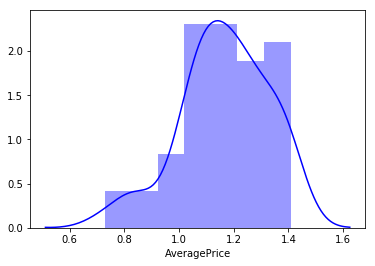

In [101]:
ax = sns.distplot(df_org_conven.loc[(df_org_conven.index.get_level_values('type')=='conventional')]["AveragePrice"], color = 'b')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


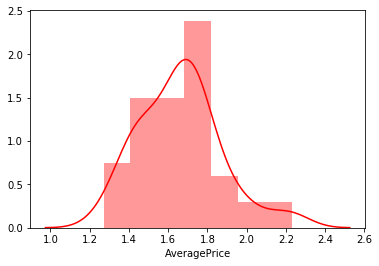

In [102]:
ax = sns.distplot(df_org_conven.loc[(df_org_conven.index.get_level_values('type')=='organic')]["AveragePrice"], color = 'r')

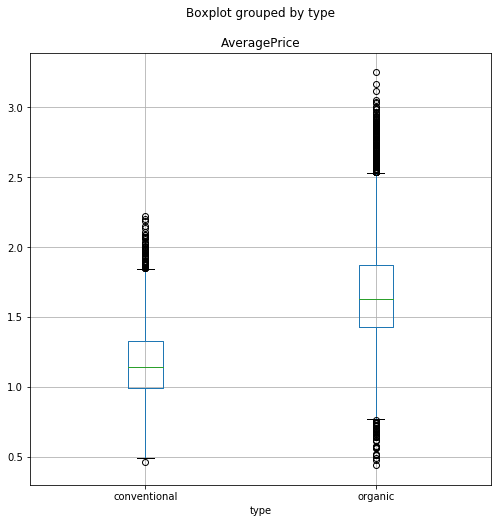

In [105]:
df.boxplot(column = 'AveragePrice', by = 'type', figsize = (8,8))
plt.show()

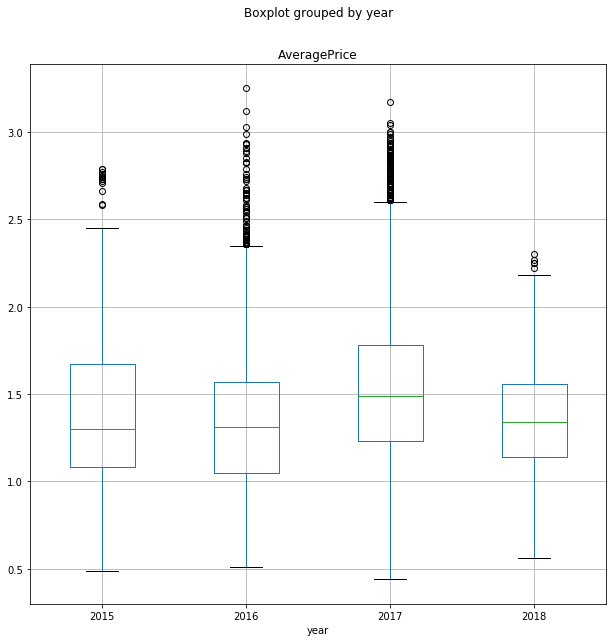

In [108]:
df.boxplot(column = 'AveragePrice', by = 'year', figsize = (10,10))
plt.show()

In [96]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.329869,-0.337637,-0.265392,-0.210231,-0.306071,-0.271820,-0.305614,-0.143504,0.092956
Total Volume,-0.329869,1.000000,0.897931,0.924787,0.738790,0.917166,0.911001,0.490730,0.658700,0.029343
4046,-0.337637,0.897931,1.000000,0.707867,0.539136,0.751266,0.762221,0.340662,0.512900,-0.000095
4225,-0.265392,0.924787,0.707867,1.000000,0.767661,0.804132,0.796074,0.439931,0.585327,-0.011743
4770,-0.210231,0.738790,0.539136,0.767661,1.000000,0.649050,0.617894,0.426669,0.673600,-0.050241
Total Bags,-0.306071,0.917166,0.751266,0.804132,0.649050,1.000000,0.980420,0.589108,0.705920,0.126054
Small Bags,-0.271820,0.911001,0.762221,0.796074,0.617894,0.980420,1.000000,0.419700,0.693017,0.105231
Large Bags,-0.305614,0.490730,0.340662,0.439931,0.426669,0.589108,0.419700,1.000000,0.340549,0.147363
XLarge Bags,-0.143504,0.658700,0.512900,0.585327,0.673600,0.705920,0.693017,0.340549,1.000000,0.099912
year,0.092956,0.029343,-0.000095,-0.011743,-0.050241,0.126054,0.105231,0.147363,0.099912,1.000000


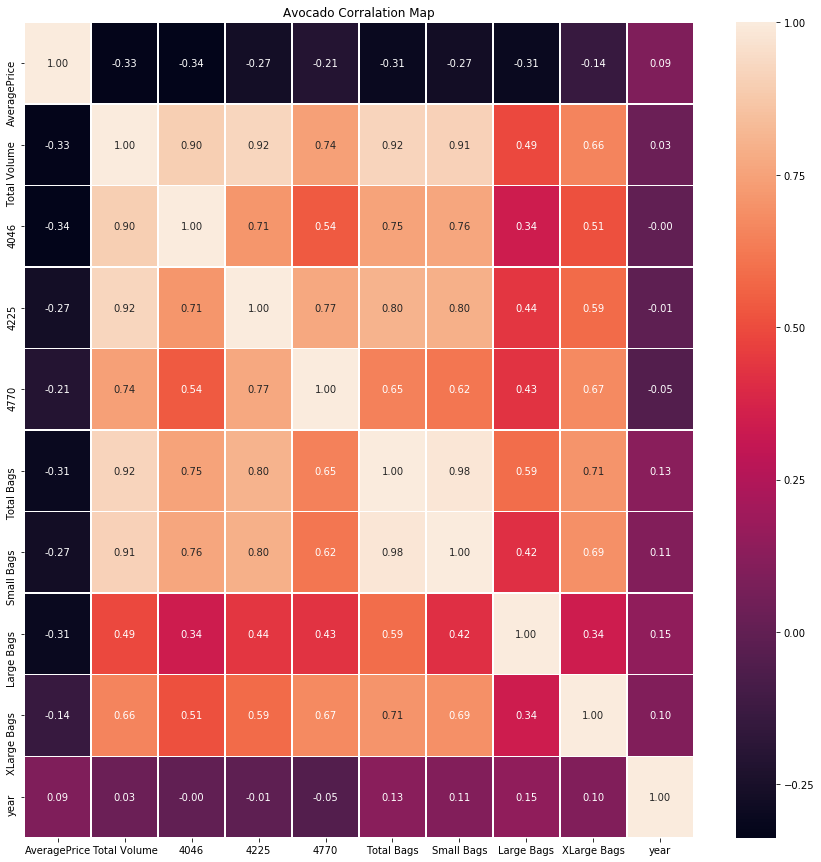

In [103]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr() , annot=True ,linewidths=.5,fmt=".2f")
plt.title("Avocado Correlation Map")
plt.show()